<a href="https://colab.research.google.com/github/EmanDiab/Data-Analysis-1-Million-arab-coders/blob/master/Assignment_1_Fisher_Steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Fisher Implementation

<font color=blue><b>1- Import Needed Packages</b></font>

In [0]:
import numpy as np
import os
import imageio
import matplotlib.pylab as plt

### Get the current directory path

In [0]:
home_path = os.getcwd()

<font color=blue><b>2- Load Images </b></font>

In [0]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/assignment_1_fisher/Train/'
os.chdir(path)

Images=os.listdir()
print(type(Images)) # How Does it store
print(Images)
print(len(Images))# To know number of them

#print(Images)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'list'>
['1356.jpg', '1301.jpg', '1269.jpg', '1357.jpg', '1302.jpg', '127.jpg', '1303.jpg', '1270.jpg', '1358.jpg', '1304.jpg', '1271.jpg', '1359.jpg', '1305.jpg', '1272.jpg', '136.jpg', '1306.jpg', '1273.jpg', '1360.jpg', '1307.jpg', '1274.jpg', '1361.jpg', '1308.jpg', '1362.jpg', '1275.jpg', '1309.jpg', '1363.jpg', '131.jpg', '1276.jpg', '1364.jpg', '1310.jpg', '1277.jpg', '1365.jpg', '1311.jpg', '1366.jpg', '1278.jpg', '1312.jpg', '1367.jpg', '1279.jpg', '1313.jpg', '1368.jpg', '128.jpg', '1314.jpg', '1369.jpg', '1280.jpg', '1315.jpg', '137.jpg', '1281.jpg', '1316.jpg', '1370.jpg', '1282.jpg', '1317.jpg', '1283.jpg', '1371.jpg', '1318.jpg', '1284.jpg', '1372.jpg', '1285.jpg', '1319.jpg', '1373.jpg', '1286.jpg', '132.jpg', '1374.jpg', '1287.jpg', '1320.jpg', '1375.jpg', '1401.jpg', '1321.jpg', '1376.jpg', '1402.jpg', '1322.jpg', '1377.jpg', '1403.jpg

<font color=blue><b>3-Sort them and read them </b></font>

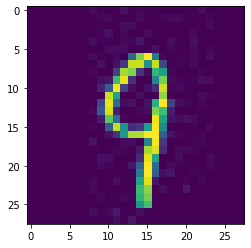

In [0]:
%matplotlib inline
Images1=sorted(Images, key=lambda t: int(os.path.splitext(t)[0])) # sort them ascendingly 
ImagF=np.zeros((2400,784))  # All Images
for i in range(len(Images1)):
    ImagF1=imageio.imread(path + Images1[i])
    ImagF[i,:]=ImagF1.reshape((1,784))
plt.imshow(ImagF1.reshape(28,28)) #To Display it

In [0]:
ImagF.shape

(2400, 784)

the whole data is 2400 and we have 10 classes so every class should have 240 row.

<font color=blue ><b>4-Training Phase (Weights) </b></font> 

In [0]:
def m1(c1):
    #Calculate mean of the intended class 
    #intended class is matix 240*784
    m1 = np.sum(c1, axis=0) / 240
    
    return m1
def m2(c2):
    #Calculate mean of the other classes
    m2 = np.sum(c2, axis=0) /2160
    return m2

In [0]:
b = np.ones((5,5))
l = []
for i in range(len(b)):
    l.append(b[i,:]@ b[i,:].T)
print(l)    

[5.0, 5.0, 5.0, 5.0, 5.0]


In [0]:
def S1(c1,m1):
    # Calculate First Term of SW
    s1_1 = c1 - m1
    #print('chape of c1- m1' + str(s1_1.shape))
    s_l =[]
    for i in range(len(s1_1)):
        s_l.append(s1_1[i,:].reshape(784,1)@ s1_1[i,:].reshape(784,1).T)
    S1_t = sum(s_l)    
        
    return S1_t 
def S2(c2,m2):
    #Calculate Second Term of SW
    s2_2 = c2 - m2
    s_2 =[]
    for i in range(len(s2_2)):
        s_2.append(s2_2[i,:].reshape(784,1)@ s2_2[i,:].reshape(784,1).T)
    S2_t = sum(s_2)  
    
    return S2_t

In [0]:
Images1

['1.jpg',
 '2.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '20.jpg',
 '21.jpg',
 '22.jpg',
 '23.jpg',
 '24.jpg',
 '25.jpg',
 '26.jpg',
 '27.jpg',
 '28.jpg',
 '29.jpg',
 '30.jpg',
 '31.jpg',
 '32.jpg',
 '33.jpg',
 '34.jpg',
 '35.jpg',
 '36.jpg',
 '37.jpg',
 '38.jpg',
 '39.jpg',
 '40.jpg',
 '41.jpg',
 '42.jpg',
 '43.jpg',
 '44.jpg',
 '45.jpg',
 '46.jpg',
 '47.jpg',
 '48.jpg',
 '49.jpg',
 '50.jpg',
 '51.jpg',
 '52.jpg',
 '53.jpg',
 '54.jpg',
 '55.jpg',
 '56.jpg',
 '57.jpg',
 '58.jpg',
 '59.jpg',
 '60.jpg',
 '61.jpg',
 '62.jpg',
 '63.jpg',
 '64.jpg',
 '65.jpg',
 '66.jpg',
 '67.jpg',
 '68.jpg',
 '69.jpg',
 '70.jpg',
 '71.jpg',
 '72.jpg',
 '73.jpg',
 '74.jpg',
 '75.jpg',
 '76.jpg',
 '77.jpg',
 '78.jpg',
 '79.jpg',
 '80.jpg',
 '81.jpg',
 '82.jpg',
 '83.jpg',
 '84.jpg',
 '85.jpg',
 '86.jpg',
 '87.jpg',
 '88.jpg',
 '89.jpg',
 '90.jpg',
 '91.jpg',
 '92.jpg

In [0]:
b = np.ones((5,5))

a = np.delete(b, [a for a in range(1,3)], axis=0)
a
b

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [0]:
W =[]
W_o = []
counter=0 
for i in range(0,len(Images1),240):
    
    #Get First Class say c1
    c1 = ImagF[i:(i+240),:]
    #Get Other Classes say c2
    c2 = np.delete(ImagF , [a for a in range(i,(i+240))], axis=0)
    #Get Means
    mean1=m1(c1)
    mean2=m2(c2)
    
    #Calculate SW
    Sw=S1(c1,mean1)+S2(c2,mean2)
    #Calculate its invers "Note Use pinv function"
    Sw_inv=np.linalg.pinv(Sw)
    #Calculate Weigths of the intended class 
    w = Sw_inv@(mean1 + mean2)
    W.append(w)
    #Calculate W_bias of it
    w_o = (np.dot(-w.T , (mean1 + mean2)))/2
    W_o.append(w_o)
    
    counter+=1
W = np.array(W)
W_o

[-0.03833277372707059,
 -0.03557781699780155,
 -0.04170459812205777,
 -0.04352019056148194,
 -0.03633708980176875,
 -0.03683508226136943,
 -0.04216854005878691,
 -0.03945447894517082,
 -0.044081756322636764,
 -0.03798955455634001]

In [0]:
W.shape
W_o = np.array(W_o)
W.shape

(10, 784)

<font color=blue ><b>5-Testing Phase </b></font>

In [0]:
#-----------------Testing---------------
path1 = '/content/drive/My Drive/assignment_1_fisher/'
os.chdir(path1)
Test_Labels=np.loadtxt("Test Labels.txt")
path='/content/drive/My Drive/assignment_1_fisher/Test'
os.chdir(path)
Test_Image=os.listdir()
Test_Image.pop()
Test_Image1=sorted(Test_Image, key=lambda t: int(os.path.splitext(t)[0]))
Imag_T=np.zeros((200,784))
for i in range(len(Test_Image1)):
    Imag=imageio.imread( Test_Image1[i])
    Imag_T[i,:]=Imag.reshape((1,784)) 
#plt.imshow(Imag.reshape(28,28))   
# Calculate Predicted Y 
X_o = np.ones((1,200))
y_predicted = np.dot(W,Imag_T.T) + np.dot(W_o.reshape((10,1)),X_o)
y_predicted = y_predicted.T
#print(y_predicted)
# Calculate Predicted Labels
y_labels =[]
for i in range(len(y_predicted)):
  y_labels.append(np.argmax(y_predicted[i,:]))

y_labels

#Calculate Accuracy and Print it
count = 0
for i in range(len(y_labels)):
  if Test_Labels[i] == y_labels[i]:
    count = count +1 
print('accuracy is : ' + str(count/200))
#Plot Confusion Matrix and save it but take care to save it in another folder NOT TRAIN or TEST


accuracy is : 0.79


In [0]:
j = [[1,2,3],[4,2,2]]
j =np.array(j)
len(j)

2